In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [24]:
log_file = "../../qlbm-output/benchmark-statevector-snapshots/qlbm.log"
with open(log_file, "r") as f:
    lines = f.readlines()

session_line = [c for c, line in enumerate(lines) if "Session" in line][1]

lines_statevector_true = lines[:session_line]
lines_statevector_false = lines[session_line:]

In [25]:
# Process statevector=True lines
combination_lines_indices = [
    c for c, line in enumerate(lines_statevector_true) if "Combination #" in line
]

sections = [
    lines_statevector_true[
        combination_lines_indices[c] : combination_lines_indices[c + 1]
        if c < len(combination_lines_indices)
        else session_line
    ]
    for c in range(len(combination_lines_indices) - 1)
]

statevector_true_records = []
for section in sections:
    sec_info = section[1].split("INFO: ")[-1].rstrip().split(", ")
    time_elapsed_ns = section[-1].split("INFO: ")[-1].rstrip().split()[-2]
    step_simulation_line_indices = [
        c for c, line in enumerate(section) if "Main circuit for step" in line
    ]
    total_duration = 0
    for sl in step_simulation_line_indices:
        step_number = section[sl].split("for step ")[-1].split()[0]
        props = section[sl].split("INFO: ")[-1].rstrip().split(", ")[1:]
        duration = section[sl + 1].split()[-2]
        total_duration += int(duration)

        statevector_true_records.append(
            {
                "Lattice": sec_info[0].split("=")[-1].split("/")[-1].split(".")[0],
                "Dimensions": sec_info[0]
                .split("=")[-1]
                .split("/")[-1]
                .split(".")[0]
                .split("_")[1],
                "Obstacles": sec_info[0]
                .split("=")[-1]
                .split("/")[-1]
                .split(".")[0]
                .split("_")[2],
                "Circuit Qubits": int(sec_info[1].split("=")[-1]),
                "Step": int(step_number),
                "Depth": int(props[1]),
                "Gates": int(props[-1][:-1]),
                "Duration (ns)": int(duration),
                "Cumulative Duration (ns)": int(total_duration),
                "Snapshots": True,
            }
        )

sv_true_df = pd.DataFrame.from_records(statevector_true_records)
sv_true_df

,Lattice,Dimensions,Obstacles,Circuit Qubits,Step,Depth,Gates,Duration (ns),Cumulative Duration (ns),Snapshots
0,2d_16x16_1_obstacle,16x16,1,18,0,1,10,631982551,631982551,True
1,2d_16x16_1_obstacle,16x16,1,18,1,3313,7652,1251987958,1883970509,True
2,2d_16x16_1_obstacle,16x16,1,18,2,3313,7652,1138225275,3022195784,True
3,2d_16x16_1_obstacle,16x16,1,18,3,3313,7652,1086353302,4108549086,True
4,2d_16x16_1_obstacle,16x16,1,18,4,3313,7652,1100042592,5208591678,True
...,...,...,...,...,...,...,...,...,...,...
79,2d_16x16_2_obstacle,16x16,2,18,1,6889,14714,1567948176,2155193275,True
80,2d_16x16_2_obstacle,16x16,2,18,2,6889,14714,1450592965,3605786240,True
81,2d_16x16_2_obstacle,16x16,2,18,3,6889,14714,1823442660,5429228900,True
82,2d_16x16_2_obstacle,16x16,2,18,4,6889,14714,1418746873,6847975773,True


In [26]:
# Process statevector=False lines
combination_lines_indices = [
    c for c, line in enumerate(lines_statevector_false) if "Combination #" in line
]

sections = [
    lines_statevector_false[
        combination_lines_indices[c] : combination_lines_indices[c + 1]
        if c < len(combination_lines_indices)
        else -1
    ]
    for c in range(len(combination_lines_indices) - 1)
]

statevector_false_records = []
for section in sections:
    sec_info = section[1].split("INFO: ")[-1].rstrip().split(", ")
    time_elapsed_ns = section[-1].split("INFO: ")[-1].rstrip().split()[-2]
    step_simulation_line_indices = [
        c for c, line in enumerate(section) if "Main circuit for step" in line
    ]
    total_duration = 0
    for sl in step_simulation_line_indices:
        step_number = section[sl].split("for step ")[-1].split()[0]
        props = section[sl].split("INFO: ")[-1].rstrip().split(", ")[1:]
        duration = section[sl + 1].split()[-2]

        total_duration += int(duration)
        statevector_false_records.append(
            {
                "Lattice": sec_info[0].split("=")[-1].split("/")[-1].split(".")[0],
                "Dimensions": sec_info[0]
                .split("=")[-1]
                .split("/")[-1]
                .split(".")[0]
                .split("_")[1],
                "Obstacles": sec_info[0]
                .split("=")[-1]
                .split("/")[-1]
                .split(".")[0]
                .split("_")[2],
                "Circuit Qubits": int(sec_info[1].split("=")[-1]),
                "Step": int(step_number),
                "Depth": int(props[1]),
                "Gates": int(props[-1][:-1]),
                "Duration (ns)": int(duration),
                "Cumulative Duration (ns)": int(total_duration),
                "Snapshots": False,
            }
        )

sv_false_df = pd.DataFrame.from_records(statevector_false_records)
sv_false_df

,Lattice,Dimensions,Obstacles,Circuit Qubits,Step,Depth,Gates,Duration (ns),Cumulative Duration (ns),Snapshots
0,2d_16x16_1_obstacle,16x16,1,18,0,1,9,12094754,12094754,False
1,2d_16x16_1_obstacle,16x16,1,18,1,3313,7659,438667473,450762227,False
2,2d_16x16_1_obstacle,16x16,1,18,2,6625,15309,1297792680,1748554907,False
3,2d_16x16_1_obstacle,16x16,1,18,3,9937,22959,1472300304,3220855211,False
4,2d_16x16_1_obstacle,16x16,1,18,4,13249,30609,1719203040,4940058251,False
...,...,...,...,...,...,...,...,...,...,...
79,2d_16x16_2_obstacle,16x16,2,18,1,6889,14721,989397066,1001890469,False
80,2d_16x16_2_obstacle,16x16,2,18,2,13777,29433,1891097678,2892988147,False
81,2d_16x16_2_obstacle,16x16,2,18,3,20665,44145,2985606628,5878594775,False
82,2d_16x16_2_obstacle,16x16,2,18,4,27553,58857,3570281351,9448876126,False


In [27]:
cdf = pd.concat([sv_true_df, sv_false_df])
cdf["Duration (s)"] = cdf["Duration (ns)"] / 1e9
cdf["Cumulative Duration (s)"] = cdf["Cumulative Duration (ns)"] / 1e9

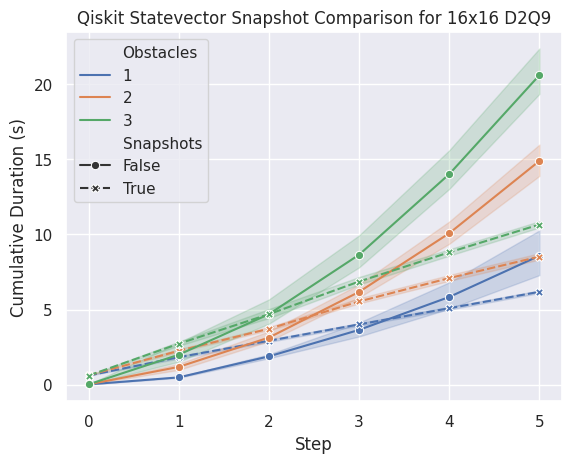

In [28]:
sns.lineplot(
    cdf[cdf["Dimensions"].isin(["16x16"])],
    x="Step",
    y="Cumulative Duration (s)",
    hue="Obstacles",
    style="Snapshots",
    markers=True,
)
plt.title("Qiskit Statevector Snapshot Comparison for 16x16 D2Q9")
plt.savefig("qiskit_d2q9_16_snapshots.pdf", format="pdf")

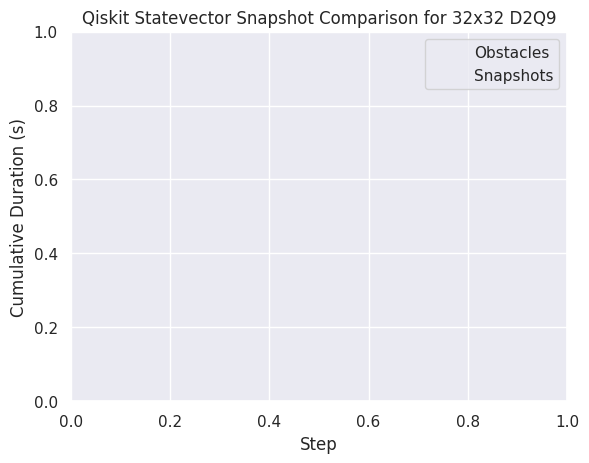

In [15]:
sns.lineplot(
    cdf[cdf["Dimensions"].isin(["32x32"])],
    x="Step",
    y="Cumulative Duration (s)",
    hue="Obstacles",
    style="Snapshots",
    markers=True,
)
plt.title("Qiskit Statevector Snapshot Comparison for 32x32 D2Q9")
plt.savefig("qiskit_d2q9_32_snapshots.pdf", format="pdf")